Reference: https://tobiassunderdiek.github.io/cartoon-gan/

Have MIT licence and can be use for commerical purposes.

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
!git clone https://github.com/Yijunmaverick/CartoonGAN-Test-Pytorch-Torch
%cd CartoonGAN-Test-Pytorch-Torch

Cloning into 'CartoonGAN-Test-Pytorch-Torch'...
remote: Enumerating objects: 154, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 154 (delta 0), reused 2 (delta 0), pack-reused 151
Receiving objects: 100% (154/154), 11.99 MiB | 19.58 MiB/s, done.
Resolving deltas: 100% (56/56), done.
/content/CartoonGAN-Test-Pytorch-Torch/CartoonGAN-Test-Pytorch-Torch


In [57]:
!sh pretrained_model/download_pth.sh

--2023-05-13 06:45:17--  http://vllab1.ucmerced.edu/~yli62/CartoonGAN/pytorch_pth/Hayao_net_G_float.pth
Resolving vllab1.ucmerced.edu (vllab1.ucmerced.edu)... 169.236.184.68
Connecting to vllab1.ucmerced.edu (vllab1.ucmerced.edu)|169.236.184.68|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44529096 (42M)
Saving to: ‘Hayao_net_G_float.pth’

Hayao_net_G_float.p 100%[===================>]  42.47M  56.1MB/s    in 0.8s    

2023-05-13 06:45:18 (56.1 MB/s) - ‘Hayao_net_G_float.pth’ saved [44529096/44529096]

--2023-05-13 06:45:18--  http://vllab1.ucmerced.edu/~yli62/CartoonGAN/pytorch_pth/Hosoda_net_G_float.pth
Resolving vllab1.ucmerced.edu (vllab1.ucmerced.edu)... 169.236.184.68
Connecting to vllab1.ucmerced.edu (vllab1.ucmerced.edu)|169.236.184.68|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44529096 (42M)
Saving to: ‘Hosoda_net_G_float.pth’

Hosoda_net_G_float. 100%[===================>]  42.47M  56.5MB/s    in 0.8s    

2023-05-13 06

Create custom set of images using https://huggingface.co/spaces/akhaliq/AnimeGANv2 

https://drive.google.com/drive/folders/1RMmnfH8IJOyr02iUKNLpsgSun8dDM7Td?usp=share_link

In [81]:
# Define imports
import time
import os
import base64

import numpy as np
from PIL import Image

import torch
import torchvision.transforms as transforms
from torch.autograd import Variable
import torchvision.utils as vutils
from network.Transformer import Transformer
import random 
import matplotlib.pyplot as plt

In [82]:
def transform(models, style, input, load_size=450, gpu=-1):
  model = models[style]

  if gpu > -1:
    model.cuda()
  else:
    model.float()

  input_image = Image.open(input).convert("RGB")
  h, w = input_image.size
  
  fig, axes = plt.subplots(1, 2)
  axes[0].imshow(input_image)  
  axes[0].set_title('Input Image') 


  ratio = h * 1.0 / w
  if ratio > 1:
      h = load_size
      w = int(h*1.0 / ratio)
  else:
      w = load_size
      h = int(w * ratio)

  input_image = input_image.resize((h, w), Image.BICUBIC)
  input_image = np.asarray(input_image)

  # convert PIL image from  RGB to BGR
  input_image = input_image[:, :, [2, 1, 0]]
  input_image = transforms.ToTensor()(input_image).unsqueeze(0)

  # transform values to (-1, 1)
  input_image = -1 + 2 * input_image
  if gpu > -1:
      input_image = Variable(input_image, volatile=True).cuda()
  else:
      input_image = input_image.float()

  with torch.no_grad():
      output_image = model(input_image)
      output_image = output_image[0]

  # convert PIL image from BGR back to RGB
  output_image = output_image[[2, 1, 0], :, :]

  # transform values back to (0, 1)
  output_image = output_image.data.cpu().float() * 0.5 + 0.5

  # convert the transformed tensor to a PIL image
  output_image = output_image.numpy()
  output_image = np.uint8(output_image.transpose(1, 2, 0) * 255)
  output_image = Image.fromarray(output_image)
  # path = 'output_'+ str(random.randint(1, 100)) + '.jpg'
  # output_image.save(path)
  
  axes[1].imshow(output_image)  
  axes[1].set_title('Output Image')
  plt.show()

  return output_image

In [60]:
styles = ["Hosoda", "Hayao", "Shinkai", "Paprika"]

models = {}

for style in styles:
  model = Transformer()
  model.load_state_dict(torch.load(os.path.join("/content/CartoonGAN-Test-Pytorch-Torch/pretrained_model/", style + '_net_G_float.pth')))
  model.eval()
  models[style] = model

In [ ]:
# path = "/content/CartoonGAN-Test-Pytorch-Torch/test_img/81341902_760531661112950_6244775361964408832_n (1).png"

In [ ]:
# output300 = transform(models, "Hosoda", path, load_size=300)

Evaluating model

In [62]:
def calculate_distance(feature1, feature2):
    # Calculate the Euclidean distance between feature1 and feature2
    distance = np.linalg.norm(feature1 - feature2)
    return distance

In [78]:
import torch

# # Instantiate the Transformer model
# model = Transformer()

# # Load the pre-trained model weights
# model.load_state_dict(torch.load('/content/CartoonGAN-Test-Pytorch-Torch/pretrained_model/Hosoda_net_G_float.pth'))

# # Set the model to evaluation mode
# model.eval()

# Function to extract feature representations
def extract_features(image_path,cartoon_image,style,load_size=450, gpu=-1):
    if gpu > -1:
      model.cuda()
    else:
      model.float()

    # Load and preprocess the input image
    input_image = transform(models, style, image_path)
    h, w = input_image.size

    ratio = h * 1.0 / w
    if ratio > 1:
        h = load_size
        w = int(h*1.0 / ratio)
    else:
        w = load_size
        h = int(w * ratio)

    
    # Convert the input image to a tensor
    input_tensor = torch.unsqueeze(transforms.ToTensor()(input_image), dim=0)
   
    cartoon_image = Image.open(cartoon_image).convert("RGB")
    cartoon_image = cartoon_image.resize((h, w), Image.BICUBIC)
    cartoon_tensor = torch.unsqueeze(transforms.ToTensor()(cartoon_image), dim=0)

    # Forward pass through the model to obtain the feature representation
    with torch.no_grad():
        features_input = model(input_tensor)
        features_cartoon = model(cartoon_tensor)
    # Flatten the feature representation
    features_input = torch.flatten(features_input, start_dim=1)
    features_cartoon = torch.flatten(features_cartoon, start_dim=1)
    # Return the feature representation as a numpy array
    return calculate_distance(features_input,features_cartoon)

In [ ]:
# Example usage
# selfie_path = '/content/CartoonGAN-Test-Pytorch-Torch/test_img/81341902_760531661112950_6244775361964408832_n (1).png'
# cartoon_path = '/content/CartoonGAN-Test-Pytorch-Torch/output_61.jpg'

# selfie_features = extract_features(selfie_path,"Hosoda")
# cartoon_features = extract_features(cartoon_path,"Hosoda")

In [ ]:
# print(calculate_distance(selfie_features, cartoon_features))

89.53035


In [74]:
import os
import glob

# Set the path to the "Custom_Set" folder
custom_set_folder = '/content/drive/MyDrive/Custom_Set'

# Define the subfolder names
real_folder = 'Real'
cartoon_folder = 'Cartoon'

# Get the paths of images in the "Real" subfolder
real_images_folder = os.path.join(custom_set_folder, real_folder)
real_image_paths = glob.glob(os.path.join(real_images_folder, '*.png'))
real_img_paths = list(real_image_paths)
real_img_paths.sort()

# Get the paths of images in the "Cartoon" subfolder
cartoon_images_folder = os.path.join(custom_set_folder, cartoon_folder)
cartoon_image_paths = glob.glob(os.path.join(cartoon_images_folder, '*.png'))
cartoon_img_paths = list(cartoon_image_paths)
cartoon_img_paths.sort()

In [75]:
print(real_img_paths)

['/content/drive/MyDrive/Custom_Set/Real/IU.png', '/content/drive/MyDrive/Custom_Set/Real/bill.png', '/content/drive/MyDrive/Custom_Set/Real/billie.png', '/content/drive/MyDrive/Custom_Set/Real/elon.png', '/content/drive/MyDrive/Custom_Set/Real/tony.png']


In [76]:
print(cartoon_img_paths)

['/content/drive/MyDrive/Custom_Set/Cartoon/cartoon_IU.png', '/content/drive/MyDrive/Custom_Set/Cartoon/cartoon_bill.png', '/content/drive/MyDrive/Custom_Set/Cartoon/cartoon_billie.png', '/content/drive/MyDrive/Custom_Set/Cartoon/cartoon_elon.png', '/content/drive/MyDrive/Custom_Set/Cartoon/cartoon_tony.png']


Evaluate each different different pretraied model 

["Hosoda", "Hayao", "Shinkai", "Paprika"]

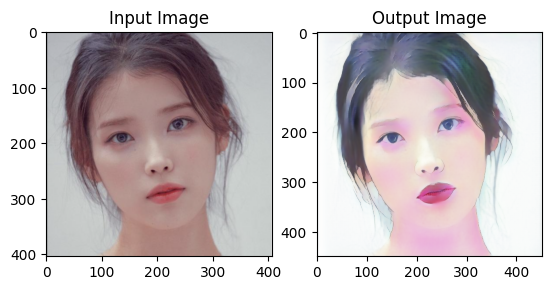

Distance between image cartoon generated '/content/drive/MyDrive/Custom_Set/Real/IU.png and cartoon test image /content/drive/MyDrive/Custom_Set/Cartoon/cartoon_IU.png': 302.091064453125


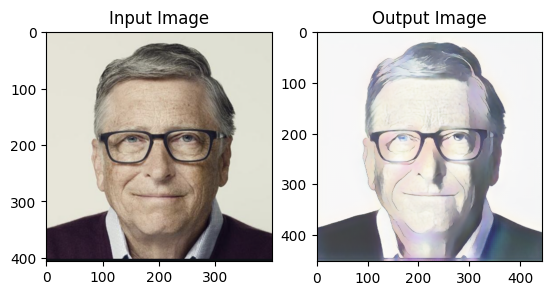

Distance between image cartoon generated '/content/drive/MyDrive/Custom_Set/Real/bill.png and cartoon test image /content/drive/MyDrive/Custom_Set/Cartoon/cartoon_bill.png': 271.3724060058594


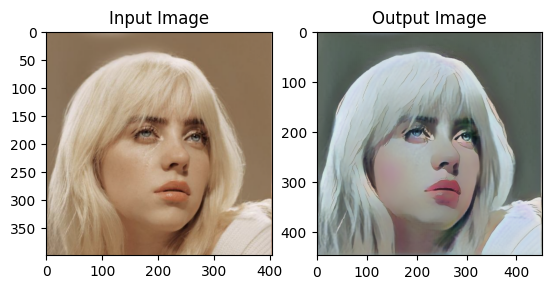

Distance between image cartoon generated '/content/drive/MyDrive/Custom_Set/Real/billie.png and cartoon test image /content/drive/MyDrive/Custom_Set/Cartoon/cartoon_billie.png': 269.2364196777344


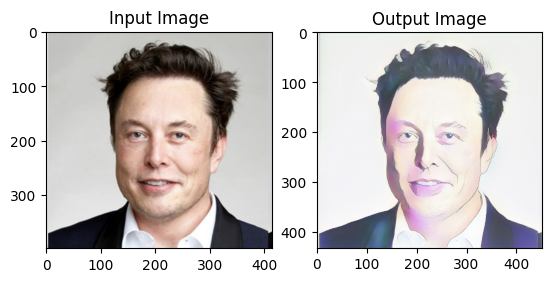

Distance between image cartoon generated '/content/drive/MyDrive/Custom_Set/Real/elon.png and cartoon test image /content/drive/MyDrive/Custom_Set/Cartoon/cartoon_elon.png': 202.8006134033203


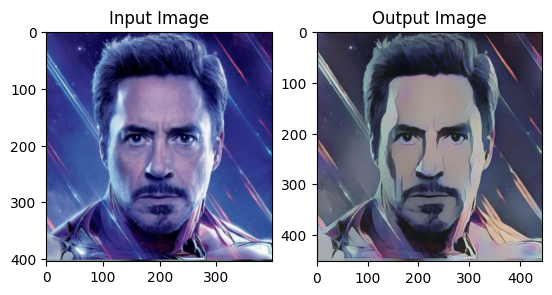

Distance between image cartoon generated '/content/drive/MyDrive/Custom_Set/Real/tony.png and cartoon test image /content/drive/MyDrive/Custom_Set/Cartoon/cartoon_tony.png': 293.1432800292969


In [83]:
# Call the extract_features() method for each image to calculate the distance
for i,j in zip(real_img_paths, cartoon_img_paths):

    # Extract features and calculate the distance
    distance = extract_features(i,j,"Hosoda")

    print(f"Distance between image cartoon generated '{i} and cartoon test image {j}': {distance}")

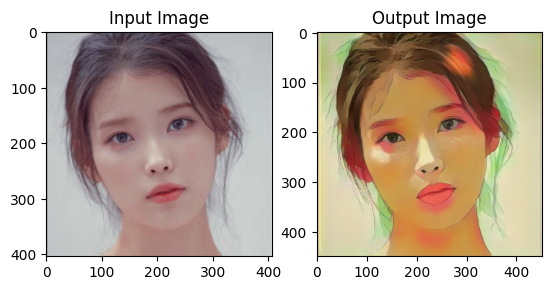

Distance between image cartoon generated '/content/drive/MyDrive/Custom_Set/Real/IU.png and cartoon test image /content/drive/MyDrive/Custom_Set/Cartoon/cartoon_IU.png': 321.492431640625


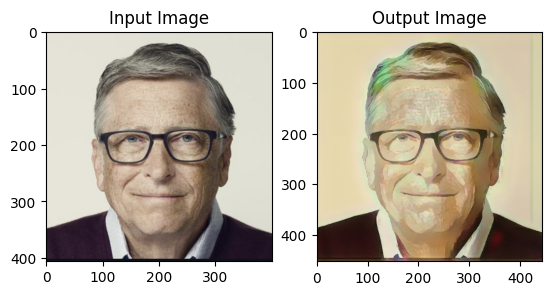

Distance between image cartoon generated '/content/drive/MyDrive/Custom_Set/Real/bill.png and cartoon test image /content/drive/MyDrive/Custom_Set/Cartoon/cartoon_bill.png': 271.2374572753906


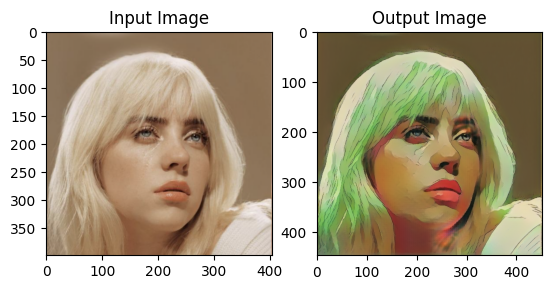

Distance between image cartoon generated '/content/drive/MyDrive/Custom_Set/Real/billie.png and cartoon test image /content/drive/MyDrive/Custom_Set/Cartoon/cartoon_billie.png': 307.4405212402344


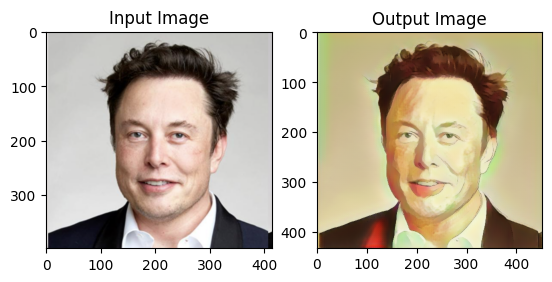

Distance between image cartoon generated '/content/drive/MyDrive/Custom_Set/Real/elon.png and cartoon test image /content/drive/MyDrive/Custom_Set/Cartoon/cartoon_elon.png': 220.17840576171875


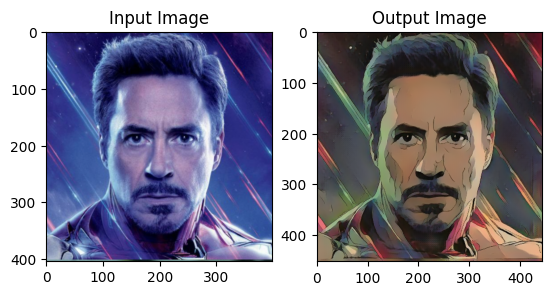

Distance between image cartoon generated '/content/drive/MyDrive/Custom_Set/Real/tony.png and cartoon test image /content/drive/MyDrive/Custom_Set/Cartoon/cartoon_tony.png': 312.4627685546875


In [84]:
# Call the extract_features() method for each image to calculate the distance
for i,j in zip(real_img_paths, cartoon_img_paths):

    # Extract features and calculate the distance
    distance = extract_features(i,j,"Hayao")

    print(f"Distance between image cartoon generated '{i} and cartoon test image {j}': {distance}")

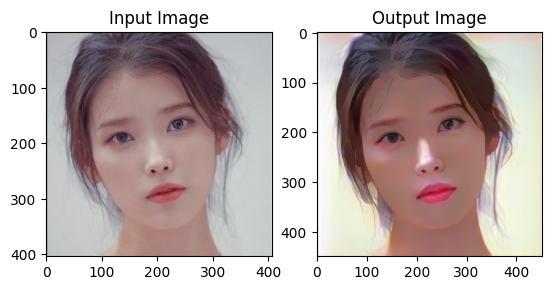

Distance between image cartoon generated '/content/drive/MyDrive/Custom_Set/Real/IU.png and cartoon test image /content/drive/MyDrive/Custom_Set/Cartoon/cartoon_IU.png': 347.2637939453125


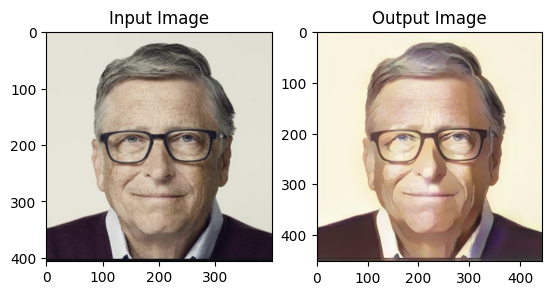

Distance between image cartoon generated '/content/drive/MyDrive/Custom_Set/Real/bill.png and cartoon test image /content/drive/MyDrive/Custom_Set/Cartoon/cartoon_bill.png': 254.9827880859375


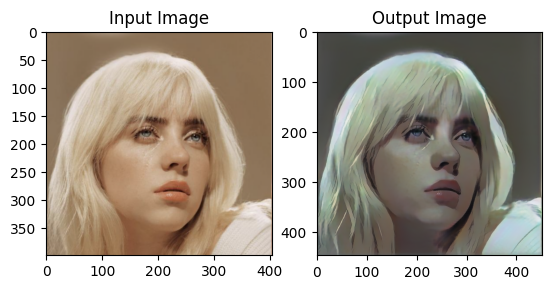

Distance between image cartoon generated '/content/drive/MyDrive/Custom_Set/Real/billie.png and cartoon test image /content/drive/MyDrive/Custom_Set/Cartoon/cartoon_billie.png': 272.32452392578125


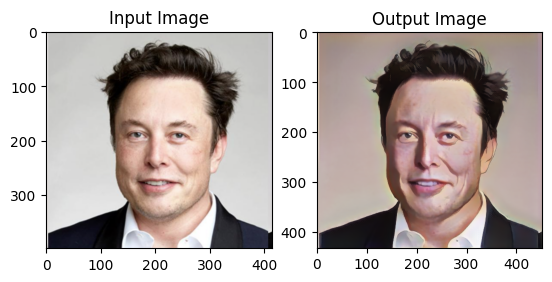

Distance between image cartoon generated '/content/drive/MyDrive/Custom_Set/Real/elon.png and cartoon test image /content/drive/MyDrive/Custom_Set/Cartoon/cartoon_elon.png': 409.9183654785156


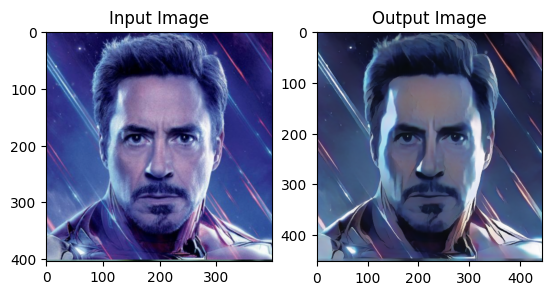

Distance between image cartoon generated '/content/drive/MyDrive/Custom_Set/Real/tony.png and cartoon test image /content/drive/MyDrive/Custom_Set/Cartoon/cartoon_tony.png': 332.1977844238281


In [85]:
# Call the extract_features() method for each image to calculate the distance
for i,j in zip(real_img_paths, cartoon_img_paths):

    # Extract features and calculate the distance
    distance = extract_features(i,j,"Shinkai")

    print(f"Distance between image cartoon generated '{i} and cartoon test image {j}': {distance}")

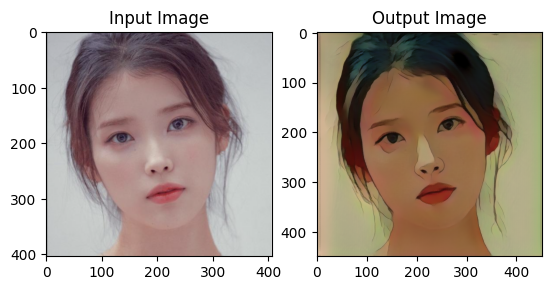

Distance between image cartoon generated '/content/drive/MyDrive/Custom_Set/Real/IU.png and cartoon test image /content/drive/MyDrive/Custom_Set/Cartoon/cartoon_IU.png': 285.7319641113281


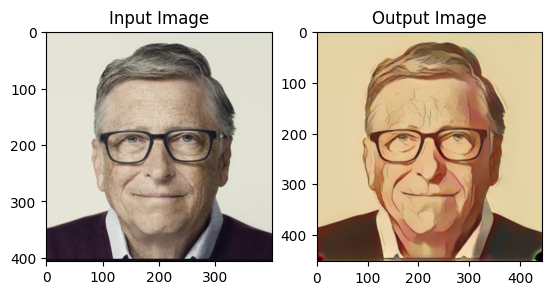

Distance between image cartoon generated '/content/drive/MyDrive/Custom_Set/Real/bill.png and cartoon test image /content/drive/MyDrive/Custom_Set/Cartoon/cartoon_bill.png': 275.8132629394531


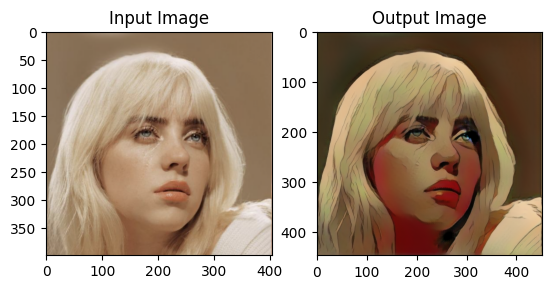

Distance between image cartoon generated '/content/drive/MyDrive/Custom_Set/Real/billie.png and cartoon test image /content/drive/MyDrive/Custom_Set/Cartoon/cartoon_billie.png': 311.7138366699219


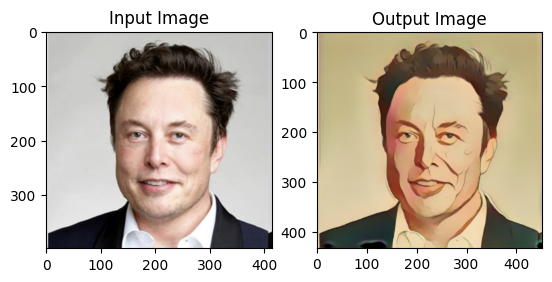

Distance between image cartoon generated '/content/drive/MyDrive/Custom_Set/Real/elon.png and cartoon test image /content/drive/MyDrive/Custom_Set/Cartoon/cartoon_elon.png': 221.59324645996094


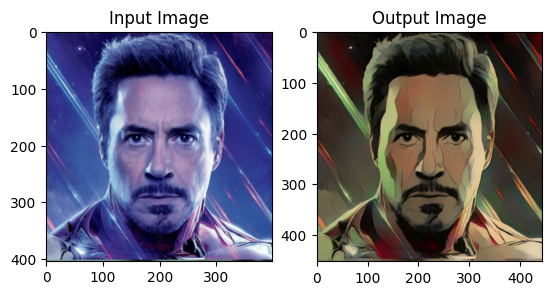

Distance between image cartoon generated '/content/drive/MyDrive/Custom_Set/Real/tony.png and cartoon test image /content/drive/MyDrive/Custom_Set/Cartoon/cartoon_tony.png': 366.1357727050781


In [86]:
# Call the extract_features() method for each image to calculate the distance
for i,j in zip(real_img_paths, cartoon_img_paths):

    # Extract features and calculate the distance
    distance = extract_features(i,j,"Paprika")

    print(f"Distance between image cartoon generated '{i} and cartoon test image {j}': {distance}")

According to the given results Shinkai_net is showing the least distance to the cartoon generated by the model and cartoon image provided by the online cartoon image generator.

These are the ground truth images used to evaluate the model and taken from the online generator. https://huggingface.co/spaces/akhaliq/AnimeGANv2

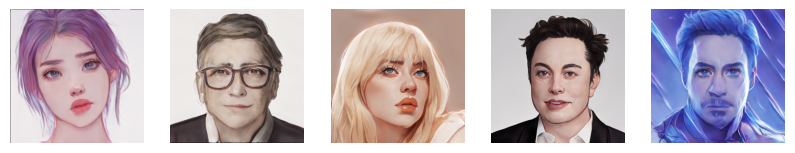

In [87]:
num_images = len(cartoon_img_paths)
fig, axes = plt.subplots(1, num_images, figsize=(10, 5))

# Iterate over the image paths and plot each image
for i, image_path in enumerate(cartoon_img_paths):
    # Open the image
    image = Image.open(image_path)

    # Plot the image on the corresponding subplot
    axes[i].imshow(image)
    axes[i].axis('off')

# Display the plot
plt.show()